In [16]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Import Data

data = pd.read_csv("D:\Elections_DataProject\election_results_2024.csv")
data.head()


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


Total Seats Won Analysis

C:\Users\dewan\AppData\Local\Temp\ipykernel_15888\2453080661.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_seats.index, y=party_seats.values, palette='viridis')


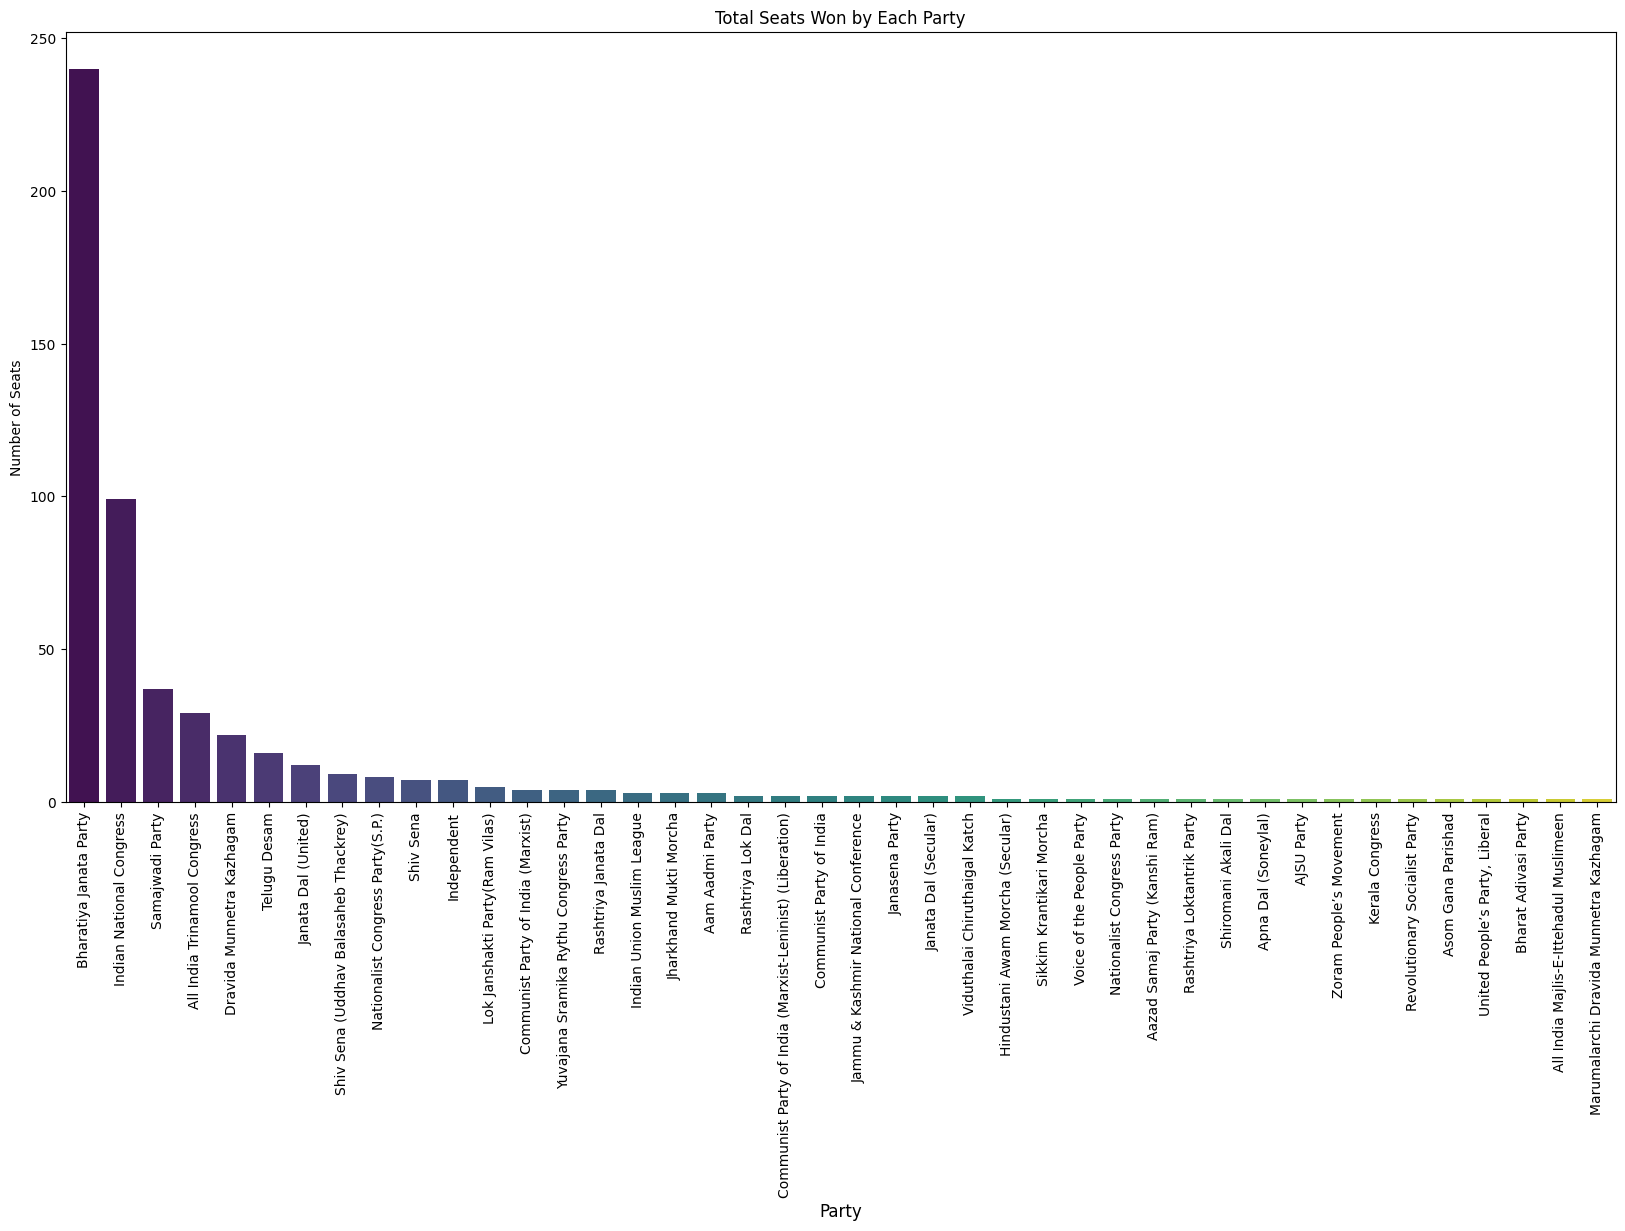

In [18]:
# Total Seats Won by Each Party

party_seats = data['Leading Party'].value_counts()
party_seats

# Plotting the Total Seats Won by Each Party

plt.figure(figsize=(20,10))
sns.barplot(x=party_seats.index, y=party_seats.values, palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of Seats')
plt.show()

Seats won with Highest and Lowest Margins

In [33]:

margin = pd.to_numeric(data['Margin'],errors='coerce')    
highest_margin = data.loc[margin.idxmax()]
lowest_margin = data.loc[margin.idxmin()]

# Highest
highest_margin
# Lowest
lowest_margin


Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                   48
Status                                      Result Declared
Name: 357, dtype: object

Star Candidate Constituencies

TypeError: can only concatenate str (not "int") to str

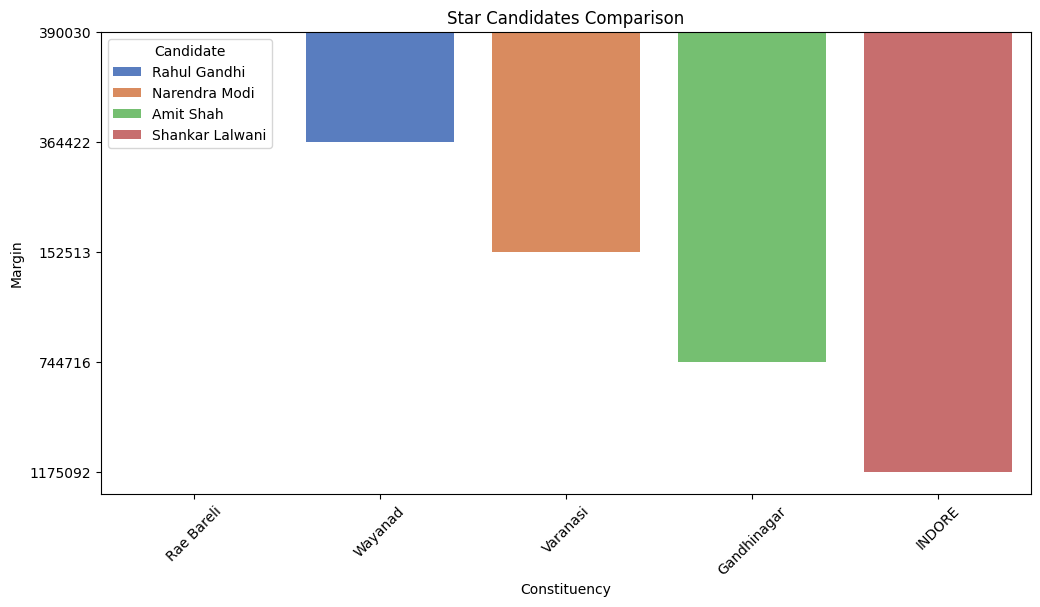

In [ ]:
NarendraModi = data[data['Leading Candidate'] == 'NARENDRA MODI']
AmitShah = data[data['Leading Candidate'] == 'AMIT SHAH']
RahulGandhi = data[data['Leading Candidate'] == 'RAHUL GANDHI']
ShankarLalwani = data[data['Leading Candidate'] == 'SHANKAR LALWANI']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = RahulGandhi['Margin'].values
modi_votes = NarendraModi['Margin'].values[0] if not NarendraModi.empty else 0
amit_votes = AmitShah['Margin'].values[0] if not AmitShah.empty else 0
lalwani_votes = ShankarLalwani['Margin'].values[0] if not ShankarLalwani.empty else 0

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(RahulGandhi['Constituency'])

# Get the original constituency name for Narendra Modi
modi_constituency = NarendraModi['Constituency'].values[0] if not NarendraModi.empty else "Modi Constituency"

# Get the original constituency name for Amit Shah
amit_constituency = AmitShah['Constituency'].values[0] if not AmitShah.empty else "Amit Shah Constituency"

# Get the original constituency name for Shankar Lalwani
lalwani_constituency = ShankarLalwani['Constituency'].values[0] if not ShankarLalwani.empty else "Shankar Lalwani Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah', 'Shankar Lalwani'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency, lalwani_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes, lalwani_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Star Candidates Comparison')
plt.xlabel('Constituency')
plt.ylabel('Margin')
plt.xticks(rotation=45)

plt.show()